In [29]:
import sklearn.datasets as skd
flores = skd.load_iris(as_frame = True)
flores.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


sum alpha*y = 0.0


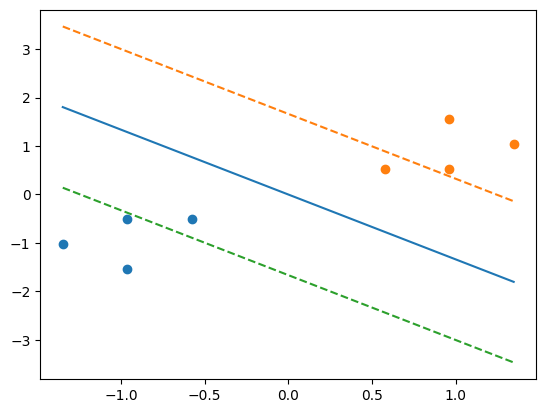

lam 				 d 

0.0  |  1.7041364881061805
0.17275851344402607  |  1.0843123525135052
0.40880146964120195  |  0.7746535412329518
0.0  |  1.7046430011377485
0.40880146964120195  |  0.7746535412329518
0.0  |  1.7046430011377485
0.0  |  1.7041364881061805
0.17275851344402607  |  1.0843123525135052
norm w
1.0039957133852913
[-1.]
[-1.  1. -1.]


In [30]:
import numpy as np
import matplotlib.pyplot as plt 
# YO 
# planteamos un problema de optimizacion convexa w.x + b = 0
# el primal min L = |w|^2/2 + C SUMA Ei  - SUMA li [ yi(w.xi + b) -1 + Ei ] - SUMA ui Ei
# el dual es max SUMA li  -SUMA li lj yi yj (xi . xj)/2
# derivando /delta li  
# delta L /delta lk = 1 - SUMA lj yj yk (xj.xk) 
#                   = 1 - yk SUMA_j lj yj Kjk

    
def resolver_dual(X,y,C=1.0,lr=0.0001,N=10000):
    n = len(y)
    lam = np.zeros(n)
    K = X@X.T
    for _ in range(N):
        grad = 1 - y*(K@(lam*y))      # Kij = X @ X.T kernel lineal xi.xj , lam. y  K @ (lam.y) = SUMA liyjKij luego por yi
        lam = lam + lr * grad         # maxL(l)
        lam = np.clip(lam,0,C)        #lam = np.maximum(lam, 0) #hard:li >=0   soft-margin:0<=li<=C  
        lam = lam - y*(lam@y)/(y@y)   # SUMA liyi =0, proyeccion ortogonal quitando la componente en la direccion y
        lam = np.clip(lam,0,C)
    return lam
    
# de derivar el primal se tenia w = SUMA li yi xi
# yi(w.xi + b) = 1 depejando b = yi  - w.xi

def entrenar_svm(X,y,C=1.0):
    lam = resolver_dual(X,y,C)
    w = np.sum(lam[:,None]*y[:,None]*X,axis=0)
    sv = (lam>1e-5) & (lam<C-1e-5)       #sv = lam >1e-5  #  alpha[0,0,1.23,0,0.44,0,...] hard:alphai>0 , sv =[false,false,True,False,True,..indices]  soft-margin: 0<alphai<C
    b = np.mean(y[sv] - X[sv]@w )        # y[sv] = y[solo con indices True]
    return w,b,lam

# f= w.x + b   w= SUMA liyixi

def predecir(X,w,b):
    return np.sign(X@w + b)
    
def exactitud(y,y_p):
    return np.mean(y == y_p)
 
     
if __name__=='__main__':
    X = np.array([
        [1,2],
    [2,3],
    [3,3],
    [2,1],
    [6,5],
    [7,7],
    [8,6],
    [7,5]])
    y = np.array([-1,-1,-1,-1,1,1,1,1])
    u = X.mean(axis = 0)
    sigma = X.std(axis = 0)
    X = (X - u )/sigma
    plt.scatter(X[y==-1][:,0], X[y==-1][:,1])
    plt.scatter(X[y==1][:,0], X[y==1][:,1])
    w,b,lam = entrenar_svm(X,y) 
    print("sum alpha*y =", lam@y)               # SUMA alphai yi =0
    x_vals = np.linspace(X[:,0].min(), X[:,0].max(), 100)
    y_vals = -(w[0]*x_vals + b)/w[1]            # w.x + b =0 w1.x1 + w2.x2 + b=0 → x2 = -(b+w1.x1)/w2
    plt.plot(x_vals, y_vals)
    margin1 = -(w[0]*x_vals + b - 1)/w[1]       # w.x + b =1 → x2 = -(w1*x1 + b - 1)/w2
    margin2 = -(w[0]*x_vals + b + 1)/w[1]       # w.x + b =-1 → x2 = -(w1*x1 + b + 1)/w2
    plt.plot(x_vals, margin1, '--')
    plt.plot(x_vals, margin2, '--')
    plt.show()
    d = y*(X@w + b)                             # que tan lejos esta el punto del hiperplano en la direccion correcta  si di>1 alphai =0  , di=1 alphai>0  si di<1 alphai=C
    print("lam \t\t\t\t d \n")
    for i in range(len(y)):
        print(lam[i], " | ", d[i])
    print(f"norm w\n{np.linalg.norm(w)}")
    x_test = np.array([[4,4]])
    x_test = (x_test  - u )/sigma
    print(predecir(x_test,w,b))
    X_test = np.array([
    [4,4],
    [6,7],
    [1,2]
    ])
    X_test = (X_test - u)/sigma
    print(predecir(X_test, w, b))
    # con la data del profe
    

sum alpha*y = -0.012997430315057068
lam 				 d 

0.0001533111464965379  |  1.0986927335359602
0.0001533111464965379  |  1.0986927335359602
0.0001533111464965379  |  1.2015223284881946
0.0001533111464965379  |  0.9958631385837249
0.0001533111464965379  |  1.0986927335359602
0.08187110847521771  |  0.6864456442431761
0.0001533111464965379  |  1.0468135813179202
0.0001533111464965379  |  0.9958631385837249
0.0001533111464965379  |  1.0986927335359602
0.0001533111464965379  |  1.0477422908017644
0.0001533111464965379  |  0.9958631385837249
0.0001533111464965379  |  0.89303354363149
0.0001533111464965379  |  1.1505718857539997
0.0001533111464965379  |  1.4590606706107039
0.0001533111464965379  |  1.30435192344043
0.0001533111464965379  |  0.8921048341476454
0.0001533111464965379  |  1.0977640240521152
0.0001533111464965379  |  1.0468135813179202
0.03946435702383214  |  0.7383247964612156
0.0001533111464965379  |  0.9439839863656849
0.0001533111464965379  |  0.7902039486792556
0.000153311146

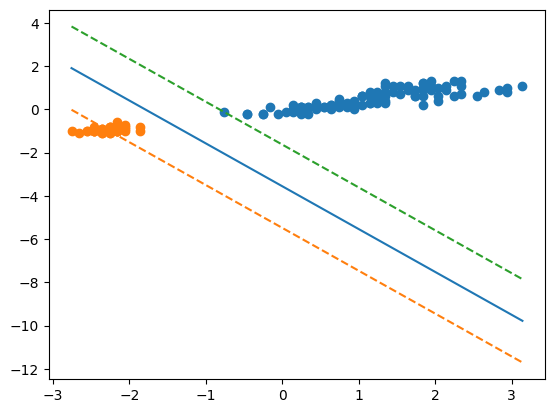

In [67]:
# YO
def testeo_flores():
    flores = skd.load_iris(as_frame = True)
    flores.frame
    X_1 = flores.data[['petal length (cm)','petal width (cm)']].values
    y = np.where(flores.target == 0,1,-1)
    u = X_1.mean(axis = 0)
    sigma = X.std(axis = 0)
    X_1 = (X_1 - u)/sigma
    w,b,lam = entrenar_svm(X_1,y)
    print("sum alpha*y =", lam@y) 
    plt.scatter(X_1[y==-1][:,0],X_1[y==-1][:,1])
    plt.scatter(X_1[y==1][:,0],X_1[y==1][:,1])
    x_s = np.linspace(X_1[:,0].min(),X_1[:,0].max(),100)
    y_s = -(w[0]*x_s + b)/w[1]
    plt.plot(x_s,y_s)
    margen1 = -(w[0]*x_s + b - 1)/w[1]
    margen2 = -(w[0]*x_s + b + 1)/w[1]
    plt.plot(x_s,margen1,'--')
    plt.plot(x_s,margen2,'--')
    plt.plot()
    d = y*(X_1@w + b)                             # que tan lejos esta el punto del hiperplano en la direccion correcta  si di>1 alphai =0  , di=1 alphai>0  si di<1 alphai=C
    print("lam \t\t\t\t d \n")
    for i in range(len(y)):
        print(lam[i], " | ", d[i])
    print(f"norm w\n{np.linalg.norm(w)}")
    print(d.min())
    np.sum(lam > 1-1e-5)
testeo_flores()

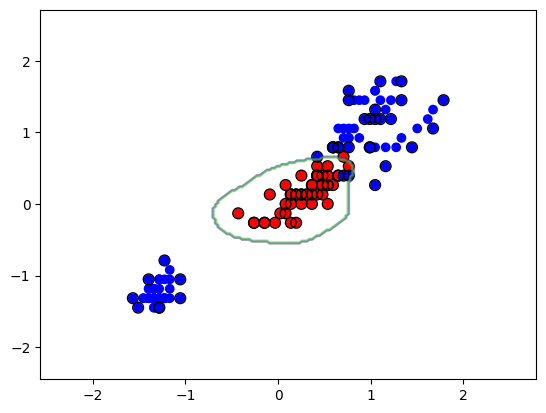

support vectors: 84
max lambda: 1.0041671330584898
min lambda>0: 0.0011050241311442756


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_18036\3419992.py:88: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auc_score = np.trapz(tpr, fpr)


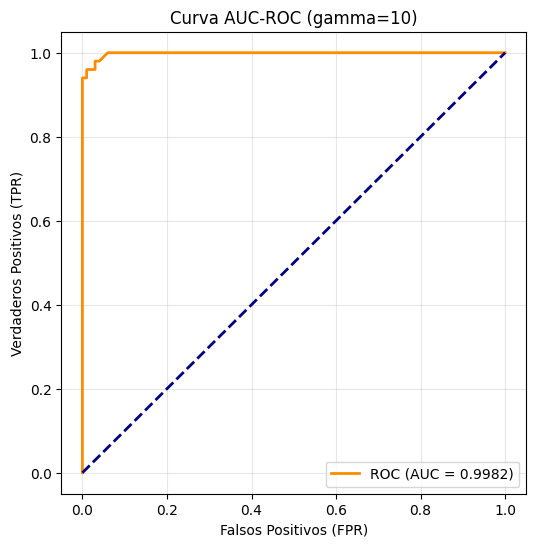

In [1]:
   # YO 
#-----------------CON KERNEL----------------------------
import sklearn.datasets as skd
flores = skd.load_iris(as_frame = True)
flores.data
import numpy as np
import matplotlib.pyplot as plt 

def K_rbf(X,gamma):
    # |xi - xj|^2 = |xi|^2 + |xj|^2 - 2 xi . xj 
    x2 = np.sum(X**2,axis=1)
    m = x2.shape[0]
    col = x2.reshape(m,1)
    fil = x2.reshape(1,m)           # |x1|**2 + |x1|**2   |x1|**2 + |x2|**2   A + |x3|**2 , B+ A  B +B  B +C , C +A C +B C+C ,filas
    dist = col + fil - 2*(X@X.T)
    return np.exp(-gamma*dist)

def resolver_dual_kernel(X,y,C,gamma,lr=0.01,N=5000):
    n = len(y)
    lam = np.zeros(n)
    K = K_rbf(X,gamma)
    for _ in range(N):
        grad = 1 - y*(K@(lam*y))
        lam = lam + lr*grad
        lam = np.clip(lam,0,C)
        lam = lam - y*(lam@y)/(y@y)
    return lam

# b = yi - SUMA lj yj K(xj,xi) 

def entrenar_svm_kernel(X,y,C=1.0,gamma=1.0):
    lam = resolver_dual_kernel(X,y,C,gamma)
    sv = (lam>1e-5) & (lam<C-1e-5)
    if np.sum(sv) == 0 :
        sv = lam >1e-5            # si  alphai=0 lejos del margen , 0<alphai<C en el margen , alpha=C ruido
    K = K_rbf(X,gamma)
    k = K[:,sv]
    b = np.mean(y[sv] - (lam*y)@k)
    return lam,b

def K_rbf_(X,x,gamma):
    x1_2 = np.sum(X**2,axis=1)
    x2_2 = np.sum(x**2,axis=1)
    m = x1_2.shape[0]
    n = x2_2.shape[0]
    col = x1_2.reshape(m,1)
    fil = x2_2.reshape(1,n)
    dist = col + fil - 2*(X@x.T)
    return np.exp(-gamma*dist)

#w = SUMA li yi phi(xi)
#f = w.phi(x) + b
#f =  SUMA li yi phi(xi) . phi(x) + b
#f =  SUMA li yi (phi(xi).phi(x))+ b
#f =  SUMA li yi K(xi,x) + b

def predecir_k(X_,y,lam,b,x,gamma=1.0):
    K = K_rbf_(X_,x,gamma)
    return np.sign((lam*y)@K + b)

def grid_(X):
    xx,yy = np.meshgrid(
        np.linspace(X[:,0].min()-1,X[:,0].max()+1,200),
        np.linspace(X[:,1].min()-1,X[:,1].max()+1,200)
    )
    grid = np.c_[xx.ravel(),yy.ravel()]
    return grid,xx,yy
    
def calcular_auc_y_graficar(X, y, lam, b, gamma): 
    K = K_rbf_(X, X, gamma)
    scores = (lam * y) @ K + b               #es lo que hace predecir_k pero sin el signo , f(x) = SUMA li yi K(xi,x) + b
    umbrales = np.sort(scores)[::-1]         # distancias firmadas a la frontera, 2.5 muy seguro que es positivo, los ordena 
    tpr = [0]
    fpr = [0] 
    y_real = (y == 1).astype(int)            # en lugar de 1 -1     1 0
    for u in umbrales:
        y_p = (scores >= u).astype(int)      # umbrales=[0.8,0.2,-0.5] comparar los scores con cada u de umbral 0.8>=0.8  prediccion 1 , resto 0
        tp = np.sum((y_real == 1) & (y_p == 1))
        tn = np.sum((y_real == 0) & (y_p == 0))
        fp = np.sum((y_real == 0) & (y_p == 1))
        fn = np.sum((y_real == 1) & (y_p == 0))
        TPR = tp/(tp + fn) if (tp + fn) > 0 else 0   # de todos los reales , cuantos se atrapó
        FPR = fp/(fp + tn) if (fp + tn) > 0 else 0   # de los negativos reales, cuantos marque mal
        tpr.append(TPR)
        fpr.append(FPR)
    tpr.append(1)
    fpr.append(1) 
    auc_score = np.trapz(tpr, fpr) 
    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (AUC = {auc_score:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.title(f'Curva AUC-ROC (gamma={gamma})')
    plt.xlabel('Falsos Positivos (FPR)')
    plt.ylabel('Verdaderos Positivos (TPR)')
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.show()
    return auc_score

if __name__=='__main__':
    flores = skd.load_iris(as_frame = True)
    flores.frame
    X = flores.data[['petal length (cm)','petal width (cm)']].values
    y = np.where(flores.target==1,1,-1)
    u = X.mean(axis=0)
    sigma = X.std(axis=0)
    X = (X - u)/sigma
    lam, b = entrenar_svm_kernel(X,y,gamma=10) # documentar desde →
    grid,xx,yy = grid_(X)
    z = predecir_k(X,y,lam,b,grid,gamma=10)
    z = z.reshape(xx.shape)
    plt.scatter(X[:,0],X[:,1],c=y,cmap='bwr')
    plt.contour(xx,yy,z,alpha=0.2)
    sv = lam > 1e-5
    plt.scatter(X[sv,0], X[sv,1], 
            s=60, 
            facecolors='none', 
            edgecolors='k')
    plt.show()                                  # ← hasta
    print("support vectors:", np.sum(lam > 1e-5))   # li = 0 lejos del margen , 0<li<C sv en el margen  , li=C dentro del margen o mal clasificados
    print("max lambda:", lam.max())
    print("min lambda>0:", lam[lam>1e-5].min())
    calcular_auc_y_graficar(X, y, lam, b, gamma=10)


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_25248\3601457882.py:45: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auc2 = np.trapz(tpr2, fpr2)
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_25248\3601457882.py:46: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auc4 = np.trapz(tpr4, fpr4)


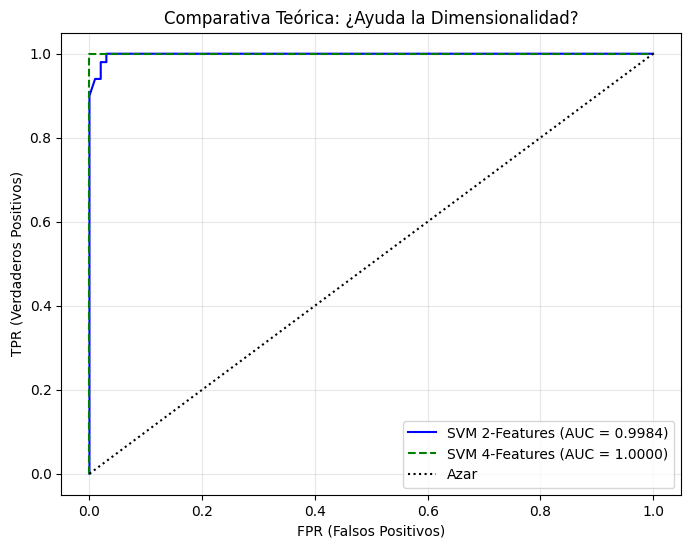

Mejora absoluta: 0.00160


In [73]:
# GEMINI
def comparar_dimensiones_svm():
    flores = skd.load_iris(as_frame=True)
    y = np.where(flores.target == 2, 1, -1)
    
    # --- CASO A: SOLO 2 COLUMNAS (Pétalos) ---
    X2 = flores.data[['petal length (cm)', 'petal width (cm)']].values
    X2 = (X2 - X2.mean(axis=0)) / X2.std(axis=0) # Normalización explícita
    lam2, b2 = entrenar_svm_kernel(X2, y, gamma=10)
    
    # --- CASO B: LAS 4 COLUMNAS (Sépalo + Pétalo) ---
    X4 = flores.data.values # Aquí van las 4 columnas del DataFrame
    X4 = (X4 - X4.mean(axis=0)) / X4.std(axis=0) # Normalización explícita en 4D
    lam4, b4 = entrenar_svm_kernel(X4, y, gamma=10)

    # --- OBTENER SCORES PARA AMBOS ---
    K2 = K_rbf_(X2, X2, gamma=10)
    scores2 = (lam2 * y) @ K2 + b2
    
    K4 = K_rbf_(X4, X4, gamma=10)
    scores4 = (lam4 * y) @ K4 + b4

    # --- FUNCIÓN AUXILIAR PARA NO REPETIR PLOT ---
    def obtener_puntos_roc(y_real_raw, scores_modelo):
        umbrales = np.sort(scores_modelo)[::-1]
        tpr_list, fpr_list = [0], [0]
        y_real_bin = (y_real_raw == 1).astype(int)
        
        for u in umbrales:
            y_p = (scores_modelo >= u).astype(int)
            tp = np.sum((y_real_bin == 1) & (y_p == 1))
            tn = np.sum((y_real_bin == 0) & (y_p == 0))
            fp = np.sum((y_real_bin == 0) & (y_p == 1))
            fn = np.sum((y_real_bin == 1) & (y_p == 0))
            
            tpr_list.append(tp / (tp + fn) if (tp + fn) > 0 else 0)
            fpr_list.append(fp / (fp + tn) if (fp + tn) > 0 else 0)
        
        tpr_list.append(1); fpr_list.append(1)
        return fpr_list, tpr_list

    # --- CÁLCULO DE PUNTOS ---
    fpr2, tpr2 = obtener_puntos_roc(y, scores2)
    fpr4, tpr4 = obtener_puntos_roc(y, scores4)
    
    auc2 = np.trapz(tpr2, fpr2)
    auc4 = np.trapz(tpr4, fpr4)

    # --- EL GRÁFICO COMPARATIVO ---
    plt.figure(figsize=(8, 6))
    plt.plot(fpr2, tpr2, label=f'SVM 2-Features (AUC = {auc2:.4f})', color='blue')
    plt.plot(fpr4, tpr4, label=f'SVM 4-Features (AUC = {auc4:.4f})', color='green', linestyle='--')
    plt.plot([0, 1], [0, 1], 'k:', label='Azar')
    
    plt.title('Comparativa Teórica: ¿Ayuda la Dimensionalidad?')
    plt.xlabel('FPR (Falsos Positivos)')
    plt.ylabel('TPR (Verdaderos Positivos)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    print(f"Mejora absoluta: {abs(auc4 - auc2):.5f}")

comparar_dimensiones_svm()


--- Resultados del SVM entrenado en 4D ---
Support Vectors (4D): 82
Max lambda (4D): 1.0024


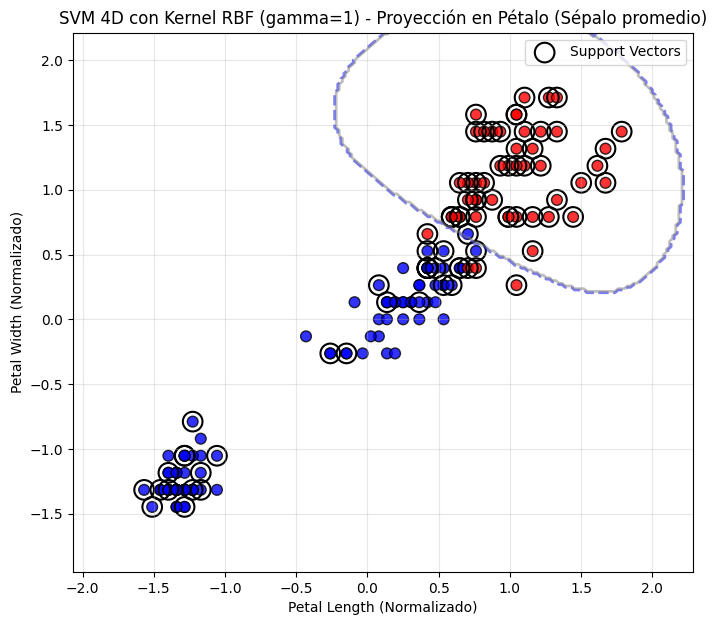


--- Curva AUC-ROC para el modelo entrenado en 4D ---


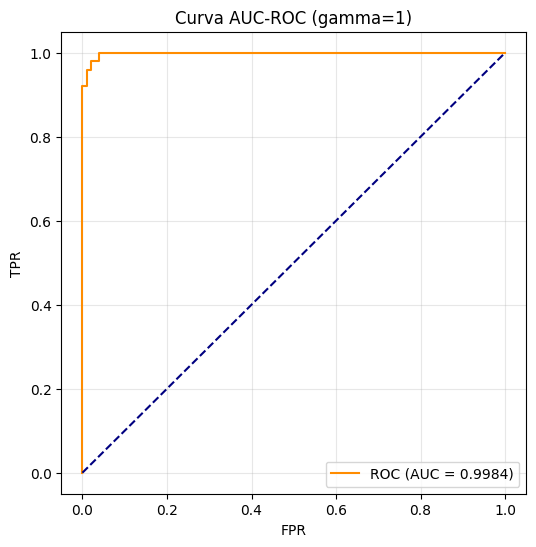

AUC del modelo 4D: 0.9984
--- Prueba con dato nuevo ---
Medidas: [[7.2 3.  6.  2.5]]
Predicción numérica: 1.0
Resultado: Iris Virginica (Target 2)


In [80]:
# GEMINI
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as skd # Asegúrate de que skd esté importado

# --- (Mantén todas tus funciones K_rbf, resolver_dual_kernel, entrenar_svm_kernel,
#      K_rbf_, predecir_k, grid_ tal cual están en tu código) ---

def visualizar_svm_en_4d_con_corte(gamma=1):
    flores = skd.load_iris(as_frame=True)
    
    # Preparamos las etiquetas y para target==2
    y = np.where(flores.target == 2, 1, -1)
    
    # Cargar TODAS LAS 4 COLUMNAS
    X_completo = flores.data.values 

    # Normalización para las 4 columnas
    u_completo = X_completo.mean(axis=0)
    sigma_completo = X_completo.std(axis=0)
    X_normalizado = (X_completo - u_completo) / sigma_completo
    
    # ENTRENAR EL SVM CON LAS 4 COLUMNAS NORMALIZADAS
    lam_4d, b_4d = entrenar_svm_kernel(X_normalizado, y, gamma=gamma)
    
    print("\n--- Resultados del SVM entrenado en 4D ---")
    print(f"Support Vectors (4D): {np.sum(lam_4d > 1e-5)}")
    print(f"Max lambda (4D): {lam_4d.max():.4f}")
    
    # --- GRÁFICO 1: Frontera de decisión usando las 2 columnas del pétalo ---
    # Para graficar en 2D, tomamos solo las columnas del pétalo
    # Pero las predicciones se basarán en el modelo 4D
    
    # Extreamos solo las columnas que vamos a graficar
    # Columna 2: 'petal length (cm)'
    # Columna 3: 'petal width (cm)'
    X_petalo = X_normalizado[:, [2, 3]] 
    
    # Creamos la malla para la frontera, basándonos solo en las dimensiones del pétalo
    xx, yy = np.meshgrid(
        np.linspace(X_petalo[:, 0].min() - 0.5, X_petalo[:, 0].max() + 0.5, 200),
        np.linspace(X_petalo[:, 1].min() - 0.5, X_petalo[:, 1].max() + 0.5, 200)
    )
    
    # PREPARACIÓN DE LA MALLA EN 4D PARA LA PREDICCIÓN
    # Aquí es donde fijamos las otras dos dimensiones (sépalos)
    # las fijamos a su promedio normalizado (0 después de la normalización)
    grid_2d_petal = np.c_[xx.ravel(), yy.ravel()]
    
    # Creamos una malla de 4D donde las columnas 0 y 1 (sépalos) son 0 (su promedio normalizado)
    # y las columnas 2 y 3 son las de la malla del pétalo
    grid_4d_para_prediccion = np.zeros((grid_2d_petal.shape[0], 4))
    # Asignamos las columnas del pétalo a sus posiciones correctas (índices 2 y 3)
    grid_4d_para_prediccion[:, 2] = grid_2d_petal[:, 0] # petal length
    grid_4d_para_prediccion[:, 3] = grid_2d_petal[:, 1] # petal width

    # Calculamos las predicciones usando el modelo 4D para la malla 4D
    # X_normalizado es X_entrenamiento (4D)
    z_4d = predecir_k(X_normalizado, y, lam_4d, b_4d, grid_4d_para_prediccion, gamma=gamma)
    z_4d = z_4d.reshape(xx.shape) # Damos forma para el contour
    
    plt.figure(figsize=(8, 7))
    plt.scatter(X_petalo[:, 0], X_petalo[:, 1], c=y, cmap='bwr', edgecolor='k', s=60, alpha=0.8)
    plt.contour(xx, yy, z_4d, levels=[-1, 0, 1], colors=['blue', 'gray', 'red'], alpha=0.5, linestyles=['--', '-', '--'], linewidths=2)
    
    # Resaltar los Support Vectors (solo los puntos que se ven en este gráfico 2D)
    sv_indices = (lam_4d > 1e-5) # Índices de los SV del modelo 4D
    plt.scatter(X_petalo[sv_indices, 0], X_petalo[sv_indices, 1],
                s=200, facecolors='none', edgecolors='k', linewidths=1.5, label='Support Vectors')
    
    plt.title(f'SVM 4D con Kernel RBF (gamma={gamma}) - Proyección en Pétalo (Sépalo promedio)')
    plt.xlabel('Petal Length (Normalizado)')
    plt.ylabel('Petal Width (Normalizado)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    # --- GRÁFICO 2: Curva AUC-ROC para el modelo 4D ---
    print("\n--- Curva AUC-ROC para el modelo entrenado en 4D ---")
    auc_4d = calcular_auc_y_graficar(X_normalizado, y, lam_4d, b_4d, gamma=gamma)
    print(f"AUC del modelo 4D: {auc_4d:.4f}")
    # --- SIMULACIÓN DE UN DATO NUEVO (X_test) ---
# Supongamos una flor con estas medidas reales:
# SepalL=7.2, SepalW=3.0, PetalL=6.0, PetalW=2.5
    x_nuevo_real = np.array([[7.2, 3.0, 6.0, 2.5]])

# 1. NORMALIZACIÓN (Usando u y sigma del entrenamiento)
# Recuerda que u y sigma ya los tienes calculados arriba
    x_nuevo_norm = (x_nuevo_real - u_completo) / sigma_completo

# 2. PREDICCIÓN
# Usamos tu función predecir_k pero sobre este punto único
    #lam_4d, b_4d = entrenar_svm_kernel(X_normalizado, y, gamma=gamma)
    prediccion = predecir_k(X_normalizado, y, lam_4d, b_4d, x_nuevo_norm, gamma=1)
    
# 3. RESULTADO
    clase = "Iris Virginica (Target 2)" if prediccion[0] == 1 else "Otra (Target 0 o 1)"

    print(f"--- Prueba con dato nuevo ---")
    print(f"Medidas: {x_nuevo_real}")
    print(f"Predicción numérica: {prediccion[0]}")
    print(f"Resultado: {clase}")
    # Asegúrate de llamar a esta nueva función
if __name__ == '__main__':
    import pandas as pd # Necesario si flores.data es un DataFrame y lo usas así

    # Aquí irían tus funciones K_rbf, resolver_dual_kernel, etc.
    # ... (las que tienes arriba) ...
    
    # Llama a la nueva función de visualización
    visualizar_svm_en_4d_con_corte(gamma=1)


--- SVM 4D (gamma=1) ---
Vectores de Soporte: 82


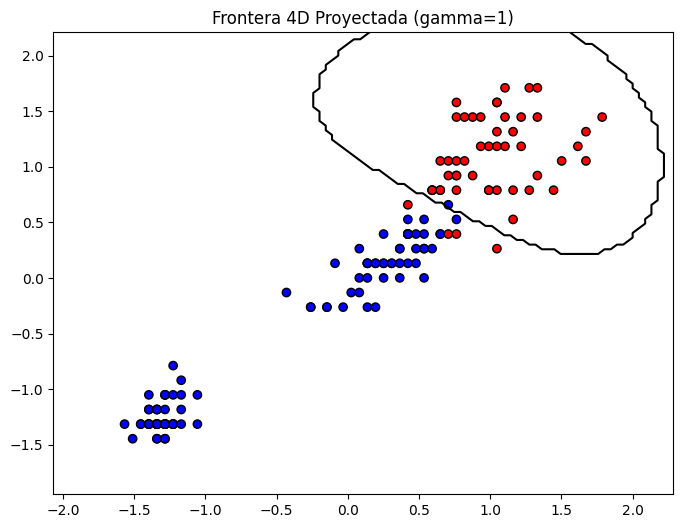

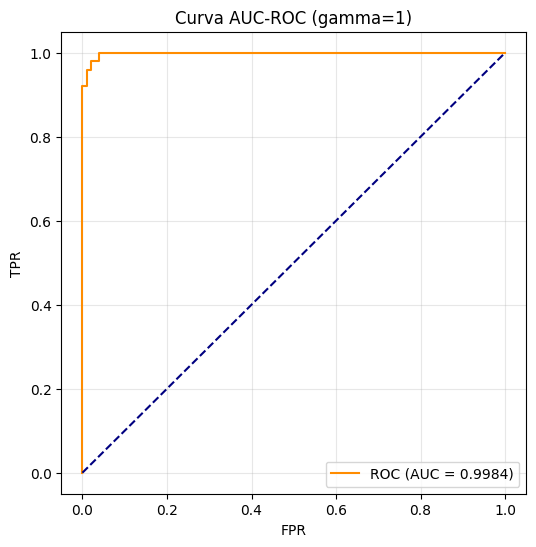


--- PRUEBA DATO NUEVO ---
Medidas: [[7.2 3.  6.  2.5]]
Score crudo (f(x)): 0.827194
Predicción numérica: 1.0
Resultado: VIRGINICA (Target 2)


In [79]:
# GEMINI
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as skd

# --- FUNCIONES CORE (SIN CAMBIOS) ---

def K_rbf(X, gamma):
    x2 = np.sum(X**2, axis=1)
    m = x2.shape[0]
    dist = x2.reshape(m, 1) + x2.reshape(1, m) - 2*(X @ X.T)
    return np.exp(-gamma * dist)

def resolver_dual_kernel(X, y, C, gamma, lr=0.01, N=5000):
    n = len(y)
    lam = np.zeros(n)
    K = K_rbf(X, gamma)
    for _ in range(N):
        grad = 1 - y * (K @ (lam * y))
        lam = lam + lr * grad
        lam = np.clip(lam, 0, C)
        lam = lam - y * (lam @ y) / (y @ y)
    return lam

def entrenar_svm_kernel(X, y, C=1.0, gamma=1.0):
    lam = resolver_dual_kernel(X, y, C, gamma)
    sv = (lam > 1e-5)
    K = K_rbf(X, gamma)
    # Calculamos b usando los vectores de soporte
    b = np.mean(y[sv] - (lam * y) @ K[:, sv])
    return lam, b

def K_rbf_(X, x, gamma):
    x1_2 = np.sum(X**2, axis=1)
    x2_2 = np.sum(x**2, axis=1)
    dist = x1_2.reshape(-1, 1) + x2_2.reshape(1, -1) - 2*(X @ x.T)
    return np.exp(-gamma * dist)

def predecir_k(X_train, y_train, lam, b, x_test, gamma):
    K = K_rbf_(X_train, x_test, gamma)
    return np.sign((lam * y_train) @ K + b)

def calcular_auc_y_graficar(X, y, lam, b, gamma): 
    K = K_rbf_(X, X, gamma)
    scores = (lam * y) @ K + b
    umbrales = np.sort(scores)[::-1]
    tpr, fpr = [0], [0]
    y_real = (y == 1).astype(int)
    
    for u in umbrales:
        y_p = (scores >= u).astype(int)
        tp = np.sum((y_real == 1) & (y_p == 1))
        tn = np.sum((y_real == 0) & (y_p == 0))
        fp = np.sum((y_real == 0) & (y_p == 1))
        fn = np.sum((y_real == 1) & (y_p == 0))
        
        tpr.append(tp/(tp + fn) if (tp + fn) > 0 else 0)
        fpr.append(fp/(fp + tn) if (fp + tn) > 0 else 0)
        
    tpr.append(1); fpr.append(1)
    auc_score = np.trapezoid(tpr, fpr) # trapz está obsoleto
    
    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr, color='darkorange', label=f'ROC (AUC = {auc_score:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.title(f'Curva AUC-ROC (gamma={gamma})')
    plt.xlabel('FPR'); plt.ylabel('TPR')
    plt.legend(); plt.grid(alpha=0.3); plt.show()
    return auc_score

# --- FUNCIÓN PRINCIPAL ---

def visualizar_y_testear_4d(gamma_val=1):
    flores = skd.load_iris(as_frame=True)
    y = np.where(flores.target == 2, 1, -1)
    X_completo = flores.data.values 

    u_completo = X_completo.mean(axis=0)
    sigma_completo = X_completo.std(axis=0)
    X_norm = (X_completo - u_completo) / sigma_completo
    
    # Entrenar
    lam_4d, b_4d = entrenar_svm_kernel(X_norm, y, gamma=gamma_val)
    
    print(f"\n--- SVM 4D (gamma={gamma_val}) ---")
    print(f"Vectores de Soporte: {np.sum(lam_4d > 1e-5)}")

    # 1. Visualización (Corte en Pétalos)
    X_petalo = X_norm[:, [2, 3]]
    xx, yy = np.meshgrid(np.linspace(X_petalo[:, 0].min()-0.5, X_petalo[:, 0].max()+0.5, 100),
                         np.linspace(X_petalo[:, 1].min()-0.5, X_petalo[:, 1].max()+0.5, 100))
    
    grid_4d = np.zeros((xx.ravel().shape[0], 4))
    grid_4d[:, 2] = xx.ravel()
    grid_4d[:, 3] = yy.ravel()
    
    z = predecir_k(X_norm, y, lam_4d, b_4d, grid_4d, gamma_val).reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(X_petalo[:, 0], X_petalo[:, 1], c=y, cmap='bwr', edgecolors='k')
    plt.contour(xx, yy, z, levels=[0], colors='black')
    plt.title(f"Frontera 4D Proyectada (gamma={gamma_val})")
    plt.show()

    # 2. AUC
    calcular_auc_y_graficar(X_norm, y, lam_4d, b_4d, gamma_val)

    # 3. PREDICCIÓN Y PRUEBA DE SCORE
    x_nuevo_real = np.array([[7.2, 3.0, 6.0, 2.5]]) # Virgenica de libro
    x_nuevo_norm = (x_nuevo_real - u_completo) / sigma_completo
    
    # Cálculo explícito del SCORE antes del signo
    K_test = K_rbf_(X_norm, x_nuevo_norm, gamma_val)
    score_crudo = (lam_4d * y) @ K_test + b_4d
    prediccion = np.sign(score_crudo)

    print("\n--- PRUEBA DATO NUEVO ---")
    print(f"Medidas: {x_nuevo_real}")
    print(f"Score crudo (f(x)): {score_crudo[0]:.6f}")
    print(f"Predicción numérica: {prediccion[0]}")
    print(f"Resultado: {'VIRGINICA (Target 2)' if prediccion[0] == 1 else 'OTRA'}")

if __name__ == '__main__':
    visualizar_y_testear_4d(gamma_val=1) # Prueba con gamma=1 para generalizar

--- ANÁLISIS DE MULTICOLINEALIDAD (VIF) ---
sepal length (cm)     7.072722
sepal width (cm)      2.100872
petal length (cm)    31.261498
petal width (cm)     16.090175
dtype: float64


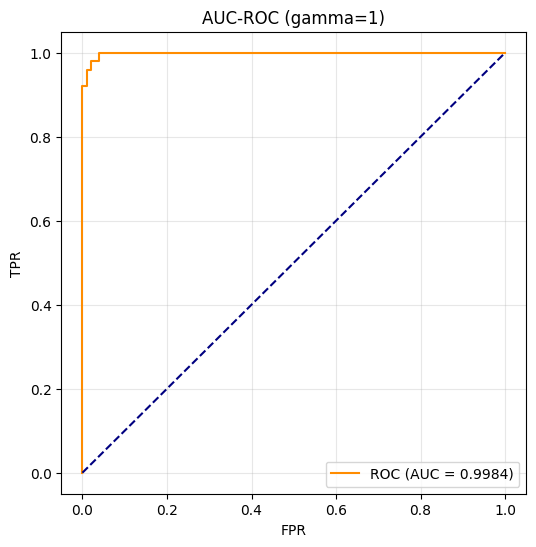


Resultados finales: AUC=0.9984, SV=82


In [1]:
#VIF 
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as skd
import pandas as pd

# --- TEORÍA VIF (Factor de Inflación de la Varianza) ---
# El VIF detecta la multicolinealidad. Si una variable puede ser explicada 
# por las otras (R^2 alto), el VIF se dispara: VIF = 1 / (1 - R^2).
# Escala: 1 (Ideal), 1-5 (Aceptable), >10 (Grave, eliminar variable).

def calcular_vif(df):
    """Calcula el VIF de forma manual para un DataFrame"""
    vif_dict = {}
    nombres_columnas = df.columns
    for col in nombres_columnas:
        # 1. Tomar una variable como 'target' (y_temp)
        y_temp = df[col].values
        # 2. El resto como 'predictores' (X_temp)
        X_temp = df.drop(columns=[col]).values
        
        # 3. Regresión Lineal Simple para obtener R^2
        # Agregamos columna de unos para el intercepto
        X_with_const = np.column_stack([np.ones(X_temp.shape[0]), X_temp])
        # Coeficientes: (X.T @ X)^-1 @ X.T @ y
        beta = np.linalg.inv(X_with_const.T @ X_with_const) @ X_with_const.T @ y_temp
        
        # Predicciones y R^2
        y_pred = X_with_const @ beta
        ss_res = np.sum((y_temp - y_pred)**2)
        ss_tot = np.sum((y_temp - np.mean(y_temp))**2)
        r_squared = 1 - (ss_res / ss_tot)
        
        # 4. Fórmula VIF
        vif_dict[col] = 1 / (1 - r_squared) if r_squared < 1 else float('inf')
        
    return pd.Series(vif_dict)

# --- FUNCIONES SVM CON KERNEL (TU IMPLEMENTACIÓN) ---

def K_rbf(X, gamma):
    x2 = np.sum(X**2, axis=1)
    m = x2.shape[0]
    dist = x2.reshape(m,1) + x2.reshape(1,m) - 2*(X @ X.T)
    return np.exp(-gamma * dist)

def resolver_dual_kernel(X, y, C, gamma, lr=0.01, N=5000):
    n = len(y)
    lam = np.zeros(n)
    K = K_rbf(X, gamma)
    for _ in range(N):
        grad = 1 - y * (K @ (lam * y))
        lam = lam + lr * grad
        lam = np.clip(lam, 0, C)
        lam = lam - y * (lam @ y) / (y @ y)
    return lam

def entrenar_svm_kernel(X, y, C=1.0, gamma=1.0):
    lam = resolver_dual_kernel(X, y, C, gamma)
    sv = (lam > 1e-5) & (lam < C - 1e-5)
    if np.sum(sv) == 0: sv = lam > 1e-5
    K = K_rbf(X, gamma)
    b = np.mean(y[sv] - (lam * y) @ K[:, sv])
    return lam, b

def K_rbf_(X, x, gamma):
    x1_2 = np.sum(X**2, axis=1)
    x2_2 = np.sum(x**2, axis=1)
    dist = x1_2.reshape(-1, 1) + x2_2.reshape(1, -1) - 2*(X @ x.T)
    return np.exp(-gamma * dist)

def predecir_k(X_, y, lam, b, x, gamma=1.0):
    K = K_rbf_(X_, x, gamma)
    return np.sign((lam * y) @ K + b)

def calcular_auc_y_graficar(X, y, lam, b, gamma): 
    K = K_rbf_(X, X, gamma)
    scores = (lam * y) @ K + b 
    umbrales = np.sort(scores)[::-1]
    tpr, fpr = [0], [0]
    y_real = (y == 1).astype(int)
    for u in umbrales:
        y_p = (scores >= u).astype(int)
        tp = np.sum((y_real == 1) & (y_p == 1))
        tn = np.sum((y_real == 0) & (y_p == 0))
        fp = np.sum((y_real == 0) & (y_p == 1))
        fn = np.sum((y_real == 1) & (y_p == 0))
        tpr.append(tp/(tp+fn) if (tp+fn)>0 else 0)
        fpr.append(fp/(fp+tn) if (fp+tn)>0 else 0)
    tpr.append(1); fpr.append(1)
    auc_score = np.trapezoid(tpr, fpr)
    
    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr, color='darkorange', label=f'ROC (AUC = {auc_score:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.title(f'AUC-ROC (gamma={gamma})')
    plt.xlabel('FPR'); plt.ylabel('TPR')
    plt.legend(); plt.grid(alpha=0.3); plt.show()
    return auc_score

# --- EJECUCIÓN PRINCIPAL ---

if __name__ == '__main__':
    flores = skd.load_iris(as_frame=True)
    
    # 1. Análisis de VIF previo
    print("--- ANÁLISIS DE MULTICOLINEALIDAD (VIF) ---")
    vifs = calcular_vif(flores.data)
    print(vifs)
    # Nota: Verás que petal length/width tienen VIFs altos porque están muy correlacionados.

    # 2. Preparación 4D
    X_raw = flores.data.values
    y = np.where(flores.target == 2, 1, -1)
    u = X_raw.mean(axis=0)
    sigma = X_raw.std(axis=0)
    X = (X_raw - u) / sigma
    
    # 3. Entrenamiento y AUC
    gamma_actual = 1
    lam, b = entrenar_svm_kernel(X, y, gamma=gamma_actual)
    
    auc = calcular_auc_y_graficar(X, y, lam, b, gamma=gamma_actual)
    print(f"\nResultados finales: AUC={auc:.4f}, SV={np.sum(lam > 1e-5)}")